In [439]:
import numpy as np
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt

In [312]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
file = open('WhatsApp Chat 3.0.txt',mode='r')
watsup_content = file.read()
file.close()
watsup_content

In [314]:
contents=watsup_content.split("\n")

#### Here it shows the gist of how the chat looks like.

In [315]:
for i in range(0,4):
    print(contents[i])
    print("----")

18/07/19, 8:17 pm - Messages to this group are now secured with end-to-end encryption. Tap for more info.
----
18/07/19, 8:17 pm - You created group "🤔🤔🤔🤔🤔"
----
18/07/19, 8:21 pm - Sudarshan Great Lakes: What group man?
----
18/07/19, 8:22 pm - Ajay Great Lakes: Namma pasanga group
----


In [316]:
len(contents)

12220

In [317]:
df=pd.DataFrame({"data":contents})

In [318]:
df.head()

,data
0,"18/07/19, 8:17 pm - Messages to this group are..."
1,"18/07/19, 8:17 pm - You created group ""🤔🤔🤔🤔🤔"""
2,"18/07/19, 8:21 pm - Sudarshan Great Lakes: Wha..."
3,"18/07/19, 8:22 pm - Ajay Great Lakes: Namma pa..."
4,"18/07/19, 8:23 pm - Sudarshan Great Lakes: Boo..."


In [319]:
df.shape

(12220, 1)

In [320]:
df["Group_Name"]=df["data"].str.extract('(".*")',expand=True)

In [321]:
df.head()

,data,Group_Name
0,"18/07/19, 8:17 pm - Messages to this group are...",NaN
1,"18/07/19, 8:17 pm - You created group ""🤔🤔🤔🤔🤔""","""🤔🤔🤔🤔🤔"""
2,"18/07/19, 8:21 pm - Sudarshan Great Lakes: Wha...",NaN
3,"18/07/19, 8:22 pm - Ajay Great Lakes: Namma pa...",NaN
4,"18/07/19, 8:23 pm - Sudarshan Great Lakes: Boo...",NaN


#### 'ffill' stands for 'forward fill' and will propagate last valid observation forward

In [322]:
df["Group_Name"].fillna(method='ffill',inplace=True)

#### It displays all the group names

In [ ]:
df["Group_Name"].value_counts()

#### Extracting Date from the data column

In [324]:
df["Date"]=df["data"].str.extract('(\d+\/\d+\/\d+)',expand=True)

In [325]:
df.head()

,data,Group_Name,Date
0,"18/07/19, 8:17 pm - Messages to this group are...",NaN,18/07/19
1,"18/07/19, 8:17 pm - You created group ""🤔🤔🤔🤔🤔""","""🤔🤔🤔🤔🤔""",18/07/19
2,"18/07/19, 8:21 pm - Sudarshan Great Lakes: Wha...","""🤔🤔🤔🤔🤔""",18/07/19
3,"18/07/19, 8:22 pm - Ajay Great Lakes: Namma pa...","""🤔🤔🤔🤔🤔""",18/07/19
4,"18/07/19, 8:23 pm - Sudarshan Great Lakes: Boo...","""🤔🤔🤔🤔🤔""",18/07/19


#### Extracting time from the data column

In [326]:
df["time"]=df["data"].str.extract('(\d+\:\d+\s\w*)',expand=True)

In [327]:
df.head()

,data,Group_Name,Date,time
0,"18/07/19, 8:17 pm - Messages to this group are...",NaN,18/07/19,8:17 pm
1,"18/07/19, 8:17 pm - You created group ""🤔🤔🤔🤔🤔""","""🤔🤔🤔🤔🤔""",18/07/19,8:17 pm
2,"18/07/19, 8:21 pm - Sudarshan Great Lakes: Wha...","""🤔🤔🤔🤔🤔""",18/07/19,8:21 pm
3,"18/07/19, 8:22 pm - Ajay Great Lakes: Namma pa...","""🤔🤔🤔🤔🤔""",18/07/19,8:22 pm
4,"18/07/19, 8:23 pm - Sudarshan Great Lakes: Boo...","""🤔🤔🤔🤔🤔""",18/07/19,8:23 pm


#### Extracting chat and username from the data column

In [328]:
df["text"]=df["data"].str.extract("(-\s\w*.*)",expand=True)

In [329]:
df.head()

,data,Group_Name,Date,time,text
0,"18/07/19, 8:17 pm - Messages to this group are...",NaN,18/07/19,8:17 pm,- Messages to this group are now secured with ...
1,"18/07/19, 8:17 pm - You created group ""🤔🤔🤔🤔🤔""","""🤔🤔🤔🤔🤔""",18/07/19,8:17 pm,"- You created group ""🤔🤔🤔🤔🤔"""
2,"18/07/19, 8:21 pm - Sudarshan Great Lakes: Wha...","""🤔🤔🤔🤔🤔""",18/07/19,8:21 pm,- Sudarshan Great Lakes: What group man?
3,"18/07/19, 8:22 pm - Ajay Great Lakes: Namma pa...","""🤔🤔🤔🤔🤔""",18/07/19,8:22 pm,- Ajay Great Lakes: Namma pasanga group
4,"18/07/19, 8:23 pm - Sudarshan Great Lakes: Boo...","""🤔🤔🤔🤔🤔""",18/07/19,8:23 pm,- Sudarshan Great Lakes: Boologam irukara?😂


#### Extracting name from the data column

In [330]:
df["Name"]=df["text"].str.extract("(-\s\w*.*:)",expand=True)

#### Extracting chats from the data column

In [331]:
df["Text"]=df["text"].str.extract("(:\s\w*.*)",expand=True)

In [332]:
df.head(4)

,data,Group_Name,Date,time,text,Name,Text
0,"18/07/19, 8:17 pm - Messages to this group are...",NaN,18/07/19,8:17 pm,- Messages to this group are now secured with ...,NaN,NaN
1,"18/07/19, 8:17 pm - You created group ""🤔🤔🤔🤔🤔""","""🤔🤔🤔🤔🤔""",18/07/19,8:17 pm,"- You created group ""🤔🤔🤔🤔🤔""",NaN,NaN
2,"18/07/19, 8:21 pm - Sudarshan Great Lakes: Wha...","""🤔🤔🤔🤔🤔""",18/07/19,8:21 pm,- Sudarshan Great Lakes: What group man?,- Sudarshan Great Lakes:,: What group man?
3,"18/07/19, 8:22 pm - Ajay Great Lakes: Namma pa...","""🤔🤔🤔🤔🤔""",18/07/19,8:22 pm,- Ajay Great Lakes: Namma pasanga group,- Ajay Great Lakes:,: Namma pasanga group


#### Removing First 2 rows as it dont add any value to our data

In [333]:
df.drop(df.index[0:2],inplace=True)

In [334]:
df.drop(["data","text"],axis=1,inplace=True)

#### Removing punctuations from respective columns

In [335]:
df["Text"]=df["Text"].str.replace(": ","")

In [336]:
df["Name"]=df["Name"].str.replace("- ","")

In [337]:
df["Name"]=df["Name"].str.replace(":","")

In [338]:
df.tail()

,Group_Name,Date,time,Name,Text
12215,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",26/04/20,8:05 pm,Azhagu Great Lakes,Elathukum
12216,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",26/04/20,8:09 pm,Viswa Great Lakes,Seri daa
12217,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",26/04/20,8:56 pm,Ajay Great Lakes,Pahhh
12218,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",26/04/20,8:56 pm,Ajay Great Lakes,Alagayyyy
12219,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",NaN,NaN,NaN,NaN


In [339]:
df.shape

(12218, 5)

In [249]:
df["Name"].value_counts().count()

42

#### There are 42 different values i just specified only group member names

In [340]:
df["Name"]=df["Name"][(df["Name"]=="Azhagu Great Lakes")|(df["Name"]=="Ajay Great Lakes")|(df["Name"]=="srivatsansabarish😍")|(df["Name"]=="Sudarshan Great Lakes")|(df["Name"]=="Viswa Great Lakes")|(df["Name"]=="Lakshmi Great Lakes")|(df["Name"]=="Sangeeth Great Lakes")|(df["Name"]=="Ajith Great Lakes")]

In [341]:
df.shape

(12218, 5)

In [342]:
df["Name"].value_counts()

srivatsansabarish😍       2395
Sudarshan Great Lakes    2276
Ajay Great Lakes         2235
Azhagu Great Lakes       1860
Sangeeth Great Lakes     1210
Ajith Great Lakes        1071
Viswa Great Lakes         843
Lakshmi Great Lakes        68
Name: Name, dtype: int64

In [343]:
df["Name"].isna().sum()

260

In [344]:
df.shape

(12218, 5)

#### Removing null values from the name column

In [345]:
df = df[df['Name'].notna()]

In [346]:
df.shape

(11958, 5)

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11958 entries, 2 to 12218
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Group_Name  11958 non-null  object
 1   Date        11958 non-null  object
 2   time        11958 non-null  object
 3   Name        11958 non-null  object
 4   Text        11958 non-null  object
dtypes: object(5)
memory usage: 560.5+ KB


#### Converting Date column into date time format

In [348]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y') 

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11958 entries, 2 to 12218
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Group_Name  11958 non-null  object        
 1   Date        11958 non-null  datetime64[ns]
 2   time        11958 non-null  object        
 3   Name        11958 non-null  object        
 4   Text        11958 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 560.5+ KB


#### Converting Time column into 24 hours time format

In [350]:
df["Time"] = pd.to_datetime(df['time']).dt.strftime('%H:%M')

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11958 entries, 2 to 12218
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Group_Name  11958 non-null  object        
 1   Date        11958 non-null  datetime64[ns]
 2   time        11958 non-null  object        
 3   Name        11958 non-null  object        
 4   Text        11958 non-null  object        
 5   Time        11958 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 654.0+ KB


In [352]:
df.tail()

,Group_Name,Date,time,Name,Text,Time
12214,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",2020-04-26,8:05 pm,Azhagu Great Lakes,Elathukun,20:05
12215,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",2020-04-26,8:05 pm,Azhagu Great Lakes,Elathukum,20:05
12216,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",2020-04-26,8:09 pm,Viswa Great Lakes,Seri daa,20:09
12217,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",2020-04-26,8:56 pm,Ajay Great Lakes,Pahhh,20:56
12218,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",2020-04-26,8:56 pm,Ajay Great Lakes,Alagayyyy,20:56


In [353]:
df.drop("time",axis=1,inplace=True)

In [354]:
df["Word_count"]=df["Text"].apply(lambda x:len(x))

In [355]:
df.tail()

,Group_Name,Date,Name,Text,Time,Word_count
12214,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",2020-04-26,Azhagu Great Lakes,Elathukun,20:05,9
12215,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",2020-04-26,Azhagu Great Lakes,Elathukum,20:05,9
12216,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",2020-04-26,Viswa Great Lakes,Seri daa,20:09,8
12217,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",2020-04-26,Ajay Great Lakes,Pahhh,20:56,5
12218,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",2020-04-26,Ajay Great Lakes,Alagayyyy,20:56,9


## Check if there is any emoticons in chat

In [356]:
#!pip install emoji

In [357]:
import emoji

In [358]:
"😃" in emoji.UNICODE_EMOJI

True

In [359]:
df["Emoticons_count"]=df["Text"].apply(lambda x:len(re.findall(r'[\U0001f600-\U0001f650]', x)))

In [360]:
df["Emoticons"]=df["Text"].apply(lambda x:re.findall(r'[\U0001f600-\U0001f650]', x))

In [368]:
df.iloc[22:27]

,Group_Name,Date,Name,Text,Time,Word_count,Emoticons_count,Emoticons
25,"""🤔🤔🤔🤔🤔""",2019-07-18,Viswa Great Lakes,😂😂,20:38,2,2,"[😂, 😂]"
26,"""🤔🤔🤔🤔🤔""",2019-07-18,Sudarshan Great Lakes,😂😂😂😂,20:40,4,4,"[😂, 😂, 😂, 😂]"
27,"""🤔🤔🤔🤔🤔""",2019-07-18,Sudarshan Great Lakes,Enaku natpu than mukiyam😂,20:41,25,1,[😂]
28,"""🤔🤔🤔🤔🤔""",2019-07-18,Sangeeth Great Lakes,double dekkar narayana bale aaluya neeye,21:17,40,0,[]
29,"""🤔🤔🤔🤔🤔""",2019-07-18,Sangeeth Great Lakes,@919940046487 @919566251741 @919003192617 Th...,21:18,182,2,"[😂, 😂]"


In [431]:
df["Emoticons_count"].sum()

5350

### Check for any media present 

In [371]:
df['Media']=df['Text'].str.contains('<Media omitted>')

In [372]:
df["Media"].value_counts()

False    11149
True       809
Name: Media, dtype: int64

In [373]:
df.iloc[22:27]

,Group_Name,Date,Name,Text,Time,Word_count,Emoticons_count,Emoticons,Media
25,"""🤔🤔🤔🤔🤔""",2019-07-18,Viswa Great Lakes,😂😂,20:38,2,2,"[😂, 😂]",False
26,"""🤔🤔🤔🤔🤔""",2019-07-18,Sudarshan Great Lakes,😂😂😂😂,20:40,4,4,"[😂, 😂, 😂, 😂]",False
27,"""🤔🤔🤔🤔🤔""",2019-07-18,Sudarshan Great Lakes,Enaku natpu than mukiyam😂,20:41,25,1,[😂],False
28,"""🤔🤔🤔🤔🤔""",2019-07-18,Sangeeth Great Lakes,double dekkar narayana bale aaluya neeye,21:17,40,0,[],False
29,"""🤔🤔🤔🤔🤔""",2019-07-18,Sangeeth Great Lakes,@919940046487 @919566251741 @919003192617 Th...,21:18,182,2,"[😂, 😂]",False


In [374]:
df.shape

(11958, 9)

In [387]:
#df.to_csv("Whatsapp.csv",index=False)

#### Now the dataframe is cleaned. Lets move on to the next part.

### Number of emoticons sent by each person

In [442]:
import seaborn as sns

In [443]:
emoji=df.groupby(["Name"])["Emoticons_count"].sum().sort_values()

In [444]:
emoji=emoji.reset_index(drop=False)

In [445]:
emoji.reset_index(drop=False)

,index,Name,Emoticons_count
0,0,Viswa Great Lakes,69
1,1,Lakshmi Great Lakes,109
2,2,Sangeeth Great Lakes,207
3,3,Ajith Great Lakes,391
4,4,Azhagu Great Lakes,727
5,5,srivatsansabarish😍,747
6,6,Sudarshan Great Lakes,772
7,7,Ajay Great Lakes,2328


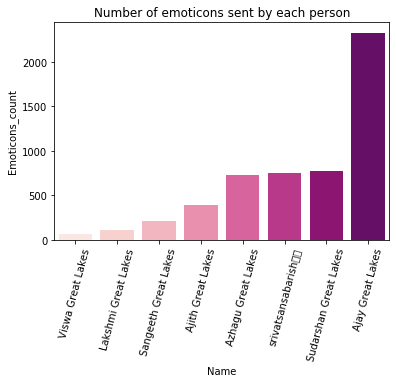

In [456]:
sns.barplot(x='Name', y='Emoticons_count', data=emoji,palette="RdPu").set_title('Number of emoticons sent by each person')
plt.xticks(rotation=75)

### Total chat count from each user

In [280]:
Message=df.groupby("Name")["Text"].count().sort_values()

In [281]:
Message=Message.reset_index(drop=False)
Message

,Name,Text
0,Lakshmi Great Lakes,68
1,Viswa Great Lakes,843
2,Ajith Great Lakes,1071
3,Sangeeth Great Lakes,1210
4,Azhagu Great Lakes,1860
5,Ajay Great Lakes,2235
6,Sudarshan Great Lakes,2276
7,srivatsansabarish😍,2395


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

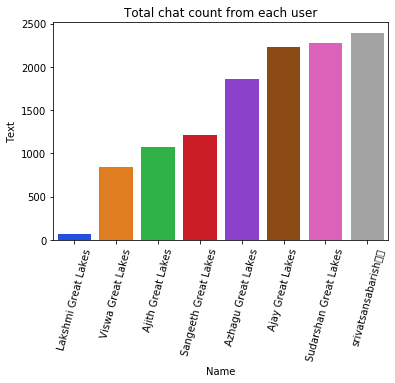

In [303]:
sns.barplot(x='Name', y='Text', data=Message,palette="bright").set_title("Total chat count from each user")
plt.xticks(rotation=75)

### Total count of words by each person

In [283]:
Text_len=df.groupby(['Name'])['Word_count'].sum()


In [284]:
Text_len=Text_len.reset_index(drop=False)
Text_len

,Name,Word_count
0,Ajay Great Lakes,42743
1,Ajith Great Lakes,17857
2,Azhagu Great Lakes,29735
3,Lakshmi Great Lakes,1041
4,Sangeeth Great Lakes,28391
5,Sudarshan Great Lakes,60132
6,Viswa Great Lakes,17556
7,srivatsansabarish😍,70325


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

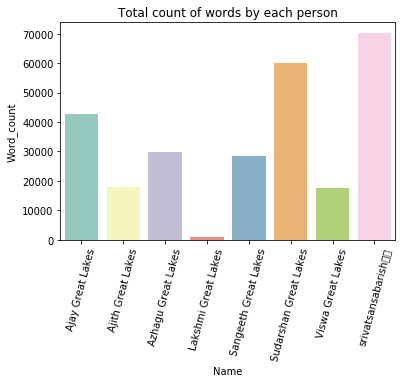

In [285]:
sns.barplot(x='Name', y='Word_count', data=Text_len,palette="Set3").set_title("Total count of words by each person")
plt.xticks(rotation=75)

### Media shared by each person

In [286]:
Media=df.groupby("Name")["Media"].sum().sort_values()

In [287]:
Media=Media.reset_index(drop=False)

In [288]:
Media

,Name,Media
0,Lakshmi Great Lakes,1.0
1,Viswa Great Lakes,53.0
2,Sudarshan Great Lakes,65.0
3,Ajith Great Lakes,89.0
4,srivatsansabarish😍,96.0
5,Ajay Great Lakes,107.0
6,Sangeeth Great Lakes,181.0
7,Azhagu Great Lakes,217.0


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

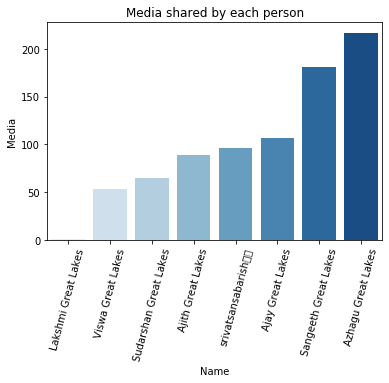

In [289]:
sns.barplot(x='Name', y='Media', data=Media,palette="Blues").set_title("Media shared by each person")
plt.xticks(rotation=75)
plt.xticks(rotation=75)

### Amount of Media shared in each month

In [290]:
month_media=df.groupby(df['Date'].dt.strftime('%B'))['Media'].sum()


In [291]:
month_media

Date
April         35.0
August       102.0
December      17.0
February       7.0
January       11.0
July          11.0
March          0.0
November     290.0
October      224.0
September    112.0
Name: Media, dtype: float64

In [292]:
month_media=month_media.reset_index(drop=False)

In [293]:
month_media

,Date,Media
0,April,35.0
1,August,102.0
2,December,17.0
3,February,7.0
4,January,11.0
5,July,11.0
6,March,0.0
7,November,290.0
8,October,224.0
9,September,112.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

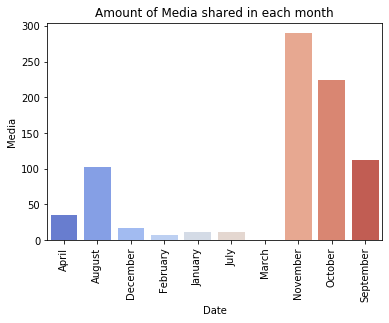

In [294]:
sns.barplot(x="Date",y="Media",data=month_media,palette="coolwarm").set_title("Amount of Media shared in each month")
plt.xticks(rotation=90)

### Total Number of chats in each month

In [295]:
month_text=df.groupby(df['Date'].dt.strftime('%B'))['Text'].count().sort_values()

In [296]:
month_text=month_text.reset_index(drop=False)
month_text

,Date,Text
0,March,25
1,January,75
2,February,137
3,April,283
4,December,589
5,July,634
6,September,1645
7,August,2293
8,October,2381
9,November,3896


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

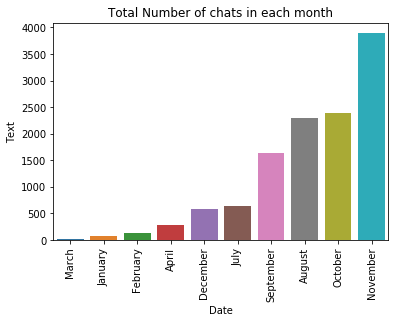

In [297]:
sns.barplot(x="Date",y="Text",data=month_text).set_title("Total Number of chats in each month")
plt.xticks(rotation=90)

### Number of Text by hour 

In [298]:
df['Time']= pd.to_datetime(df['Time'])

In [299]:
df["Time"].dt.hour

2        20
3        20
4        20
5        20
6        20
         ..
12214    20
12215    20
12216    20
12217    20
12218    20
Name: Time, Length: 11958, dtype: int64

In [306]:
hour_text=df.groupby([df["Time"].dt.hour])["Text"].count().sort_values()

In [307]:
hour_text=hour_text.reset_index(drop=False)
hour_text

,Time,Text
0,4,1
1,3,2
2,5,8
3,6,9
4,2,17
5,1,50
6,7,77
7,8,235
8,15,385
9,0,390


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text xticklabel objects>)

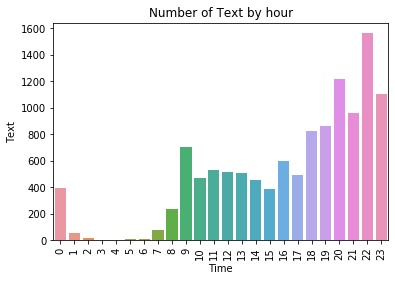

In [302]:
sns.barplot(x="Time",y="Text",data=hour_text).set_title("Number of Text by hour")
plt.xticks(rotation=90)

#### It shows that 8 P.M to 12 P.M our group becomes very active.

### Most used Emoticons

In [425]:
emo=df.Emoticons.apply(lambda x: pd.value_counts(x)).sum(axis = 0)

In [426]:
emo

😀       1.0
😁       8.0
😂    4252.0
😃      26.0
😄       7.0
😅     355.0
😆      65.0
😈       5.0
😉       5.0
😋       1.0
😍      93.0
😎      14.0
😏      57.0
😑       3.0
😒      32.0
😓      16.0
😔       4.0
😕       4.0
😖      11.0
😘       3.0
😛       6.0
😜       3.0
😝       8.0
😞      17.0
😟       1.0
😡      25.0
😢      26.0
😤       1.0
😥       1.0
😩       1.0
😪      26.0
😫       3.0
😬      81.0
😭      23.0
😮       1.0
😯       1.0
😱       5.0
😳      19.0
😴       7.0
😵       7.0
🙁       1.0
🙃       1.0
🙄      76.0
🙆       1.0
🙈       2.0
🙋      11.0
🙌      11.0
🙏      23.0
dtype: float64

In [427]:
# Top 10 emojis
emo=emo.sort_values(ascending=False).head(10)
emo

😂    4252.0
😅     355.0
😍      93.0
😬      81.0
🙄      76.0
😆      65.0
😏      57.0
😒      32.0
😃      26.0
😢      26.0
dtype: float64

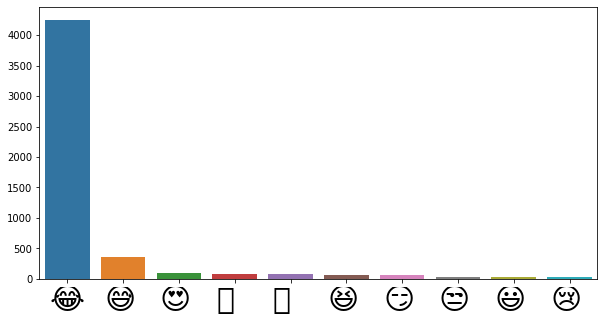

In [430]:
plt.figure(figsize=(10,5))
sns.barplot(x=emo.index,y=emo.values)
plt.xticks(fontsize=30)
plt.show()

### 😂  This is the most used emoji

### Frequently used words

In [434]:
from wordcloud import WordCloud 

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = df["Text"].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

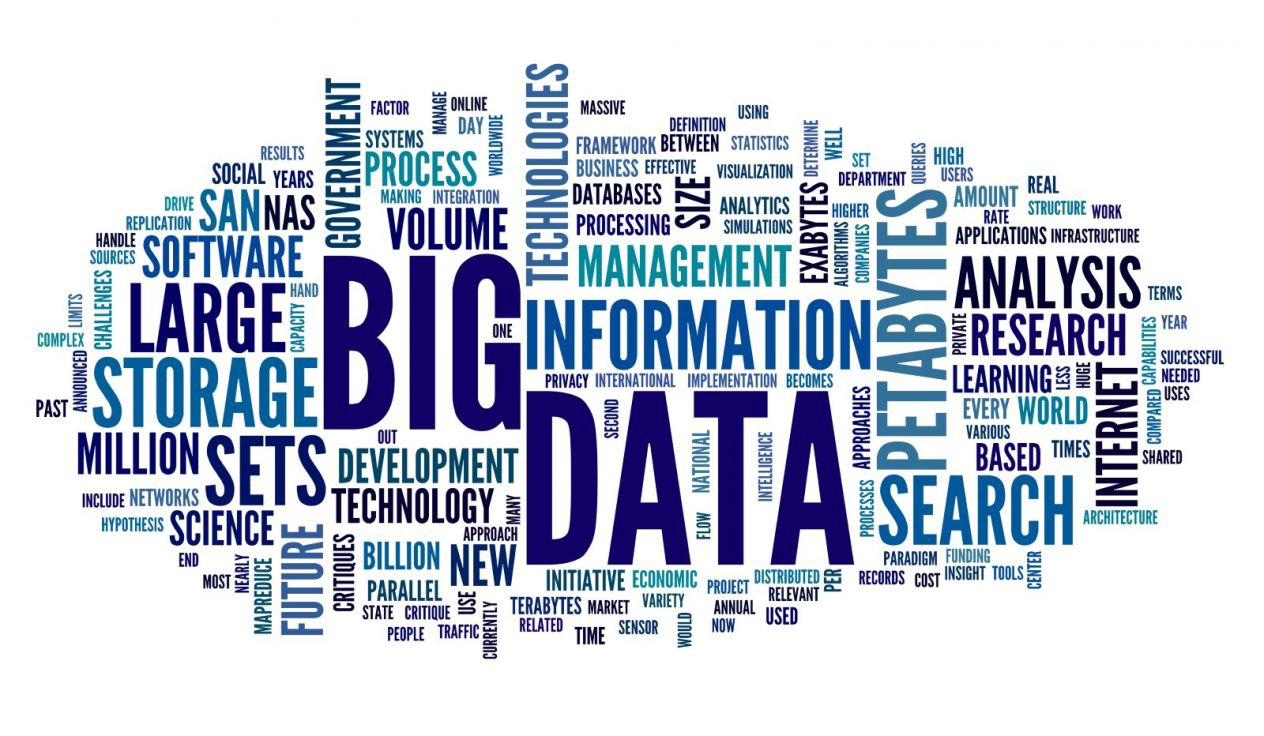

#### The above plot is just a picture not the original text as our plot shows the personal content. 

#### The texts are in native language everyone used to send messages in their own way hence my plot displayed only limited number of words, if the group chats are completely in english then we can gather more frequent words.